In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
fifa = pd.read_csv(r'C:\Users\yatha\OneDrive\Desktop\FSDS AI & ML .Naresh IT\Sep\FIFA.csv')

In [9]:
fifa

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [13]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [15]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [17]:
fifa['Body Type'].value_counts()

Body Type
Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

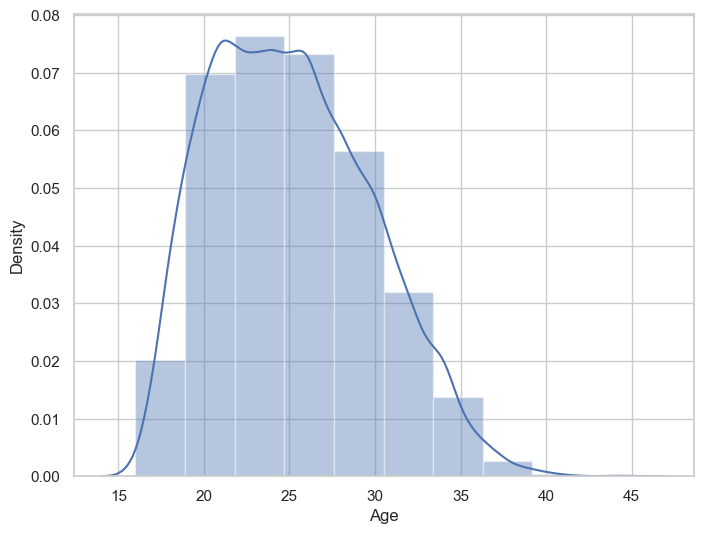

In [19]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa['Age']
ax=sns.distplot(x,bins=10)
plt.show()

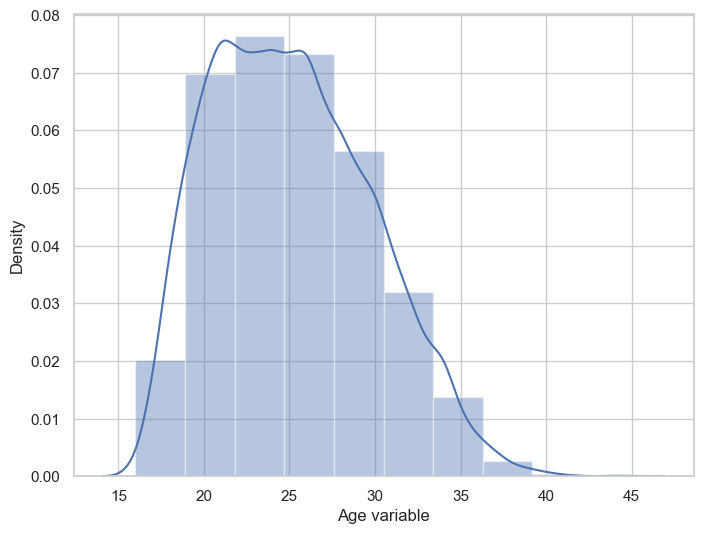

In [21]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa['Age']
x=pd.Series(x,name='Age variable')
ax=sns.distplot(x,bins=10)
plt.show()

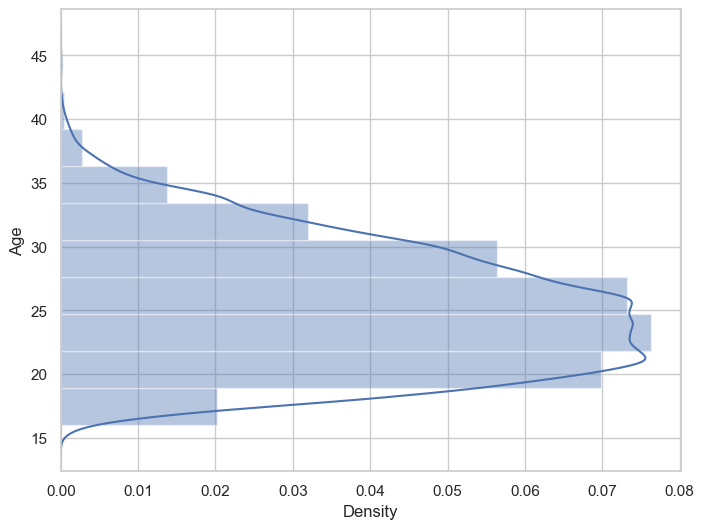

In [23]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa['Age']
ax=sns.distplot(x,bins=10,vertical=True)
plt.show()

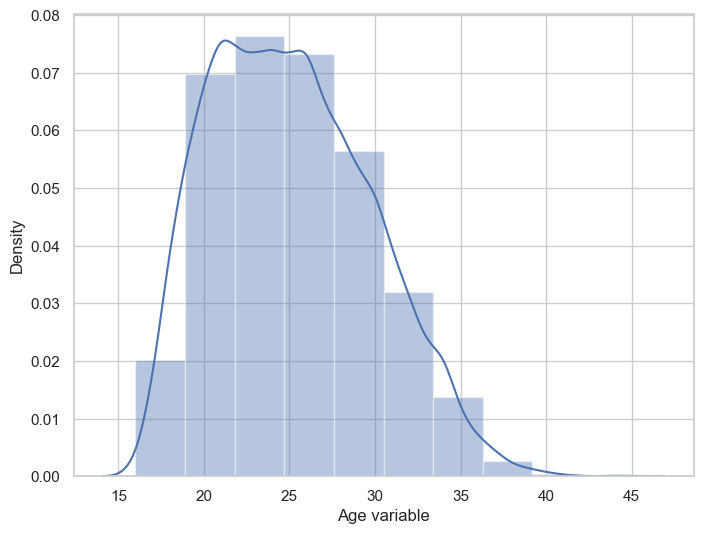

In [25]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa['Age']
x=pd.Series(x,name='Age variable')
ax=sns.distplot(x,bins=10)
plt.show()

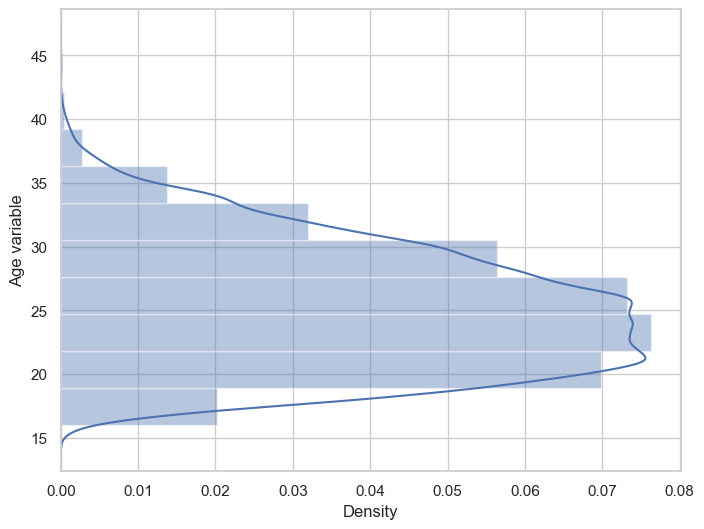

In [27]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa['Age']
x=pd.Series(x,name='Age variable')
ax=sns.distplot(x,bins=10,vertical=True)
plt.show()

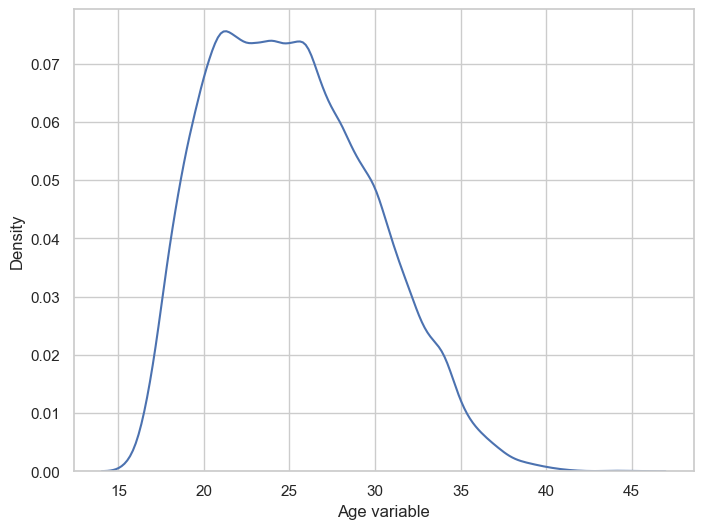

In [29]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa['Age']
x=pd.Series(x,name='Age variable')
ax=sns.kdeplot(x)
plt.show()

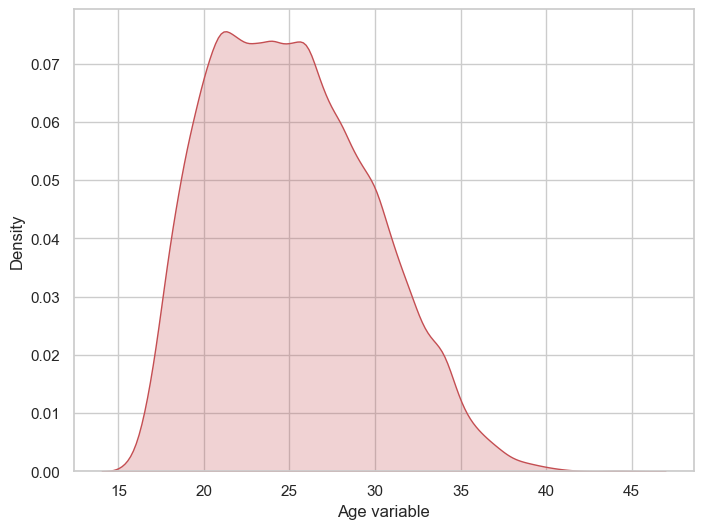

In [31]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa['Age']
x=pd.Series(x,name='Age variable')
ax=sns.kdeplot(x,shade=True,color='r')
plt.show()

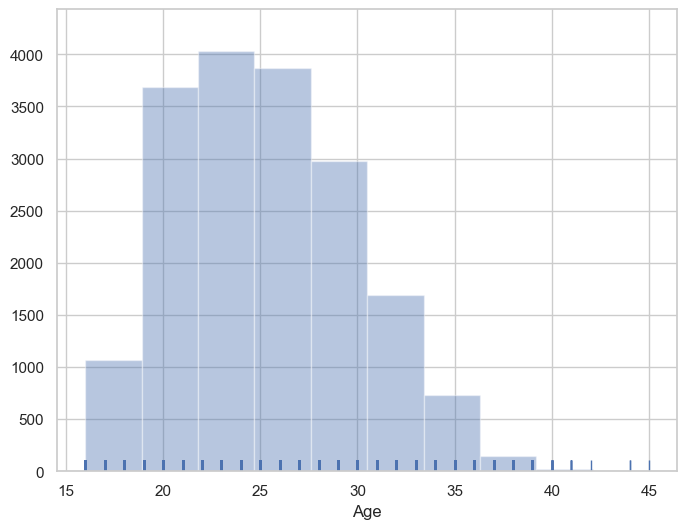

In [33]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa['Age']
ax=sns.distplot(x,kde=False,rug=True,bins=10)
plt.show()

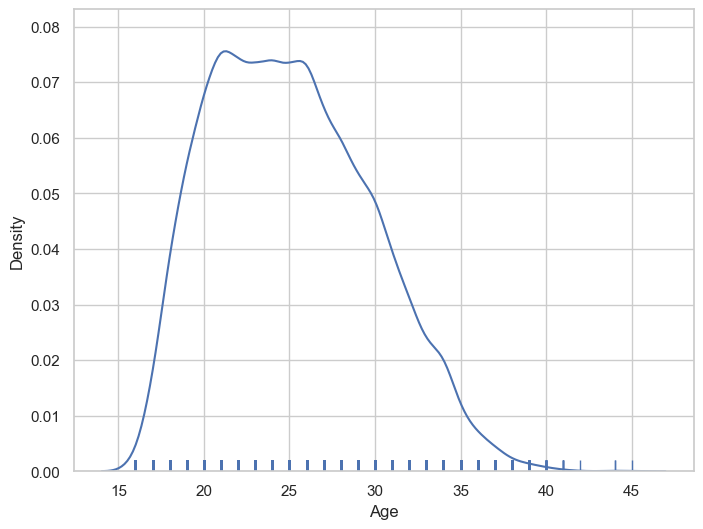

In [35]:
f,ax=plt.subplots(figsize=(8,6))
x=fifa['Age']
ax=sns.distplot(x,hist=False,rug=True,bins=10)
plt.show()

In [39]:
fifa['Preferred Foot'].unique()

array(['Left', 'Right', nan], dtype=object)

In [41]:
fifa['Preferred Foot'].nunique()

2

In [43]:
fifa['Preferred Foot'].value_counts()

Preferred Foot
Right    13948
Left      4211
Name: count, dtype: int64

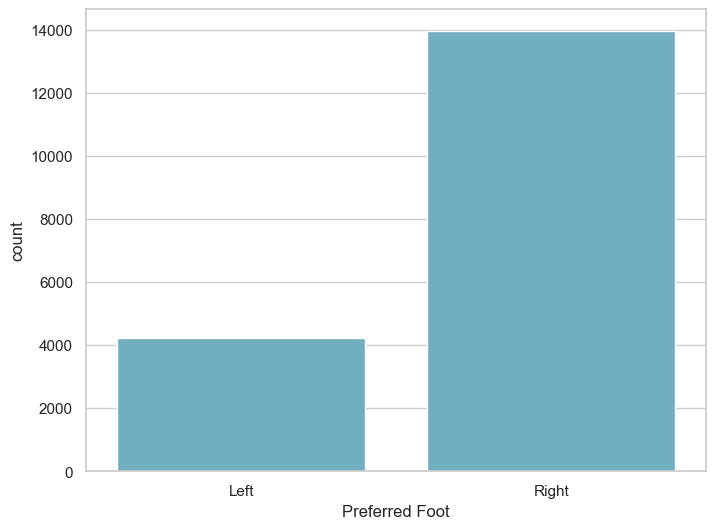

In [45]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='Preferred Foot',data=fifa,color='c')
plt.show()

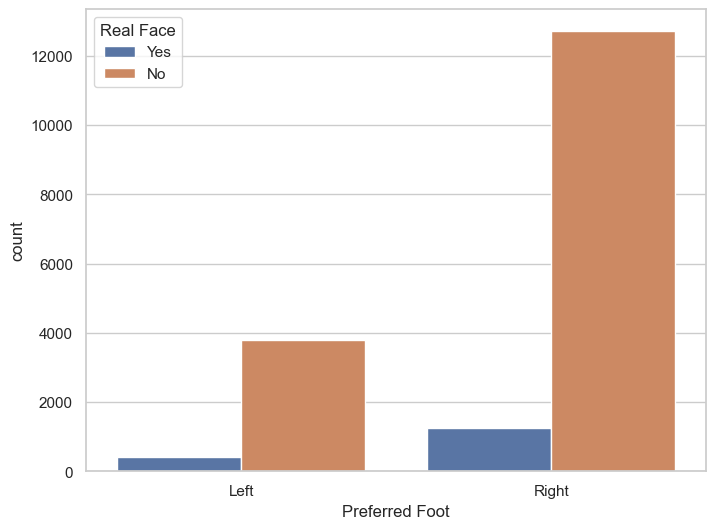

In [47]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='Preferred Foot',hue='Real Face',data=fifa)
plt.show()

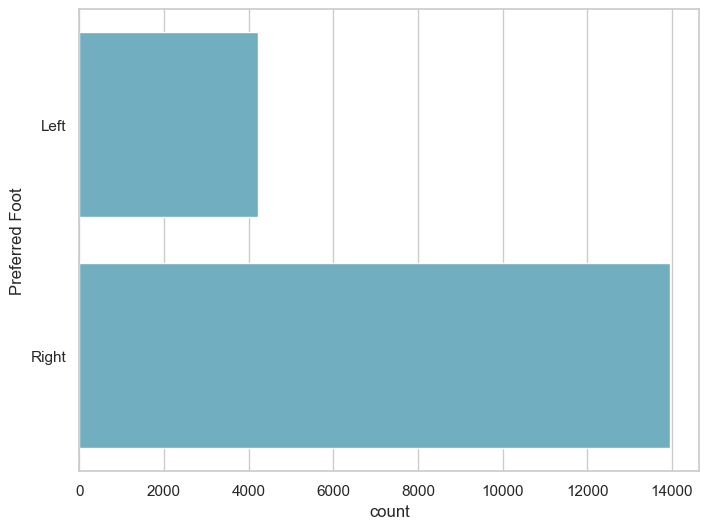

In [49]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(y='Preferred Foot',data=fifa,color='c')
plt.show()

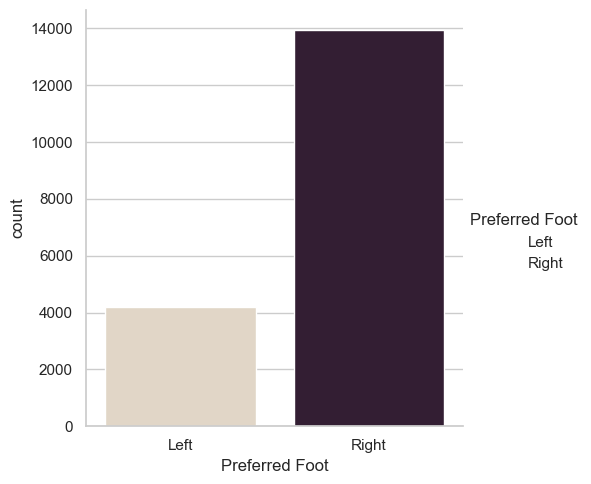

In [51]:
ax=sns.catplot(x='Preferred Foot', kind="count", palette="ch:.25",data=fifa)

In [55]:
fifa['International Reputation'].nunique()

5

In [57]:
fifa['International Reputation'].value_counts()

International Reputation
1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64

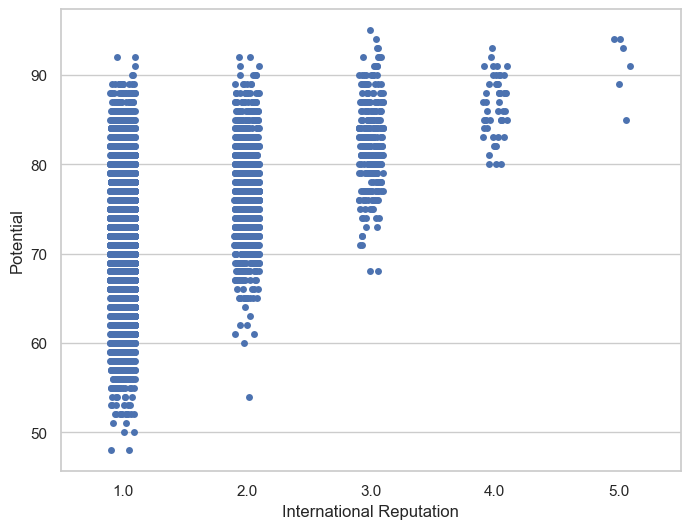

In [59]:
f,ax=plt.subplots(figsize=(8,6))
sns.stripplot(x='International Reputation',y='Potential',data=fifa)
plt.show()

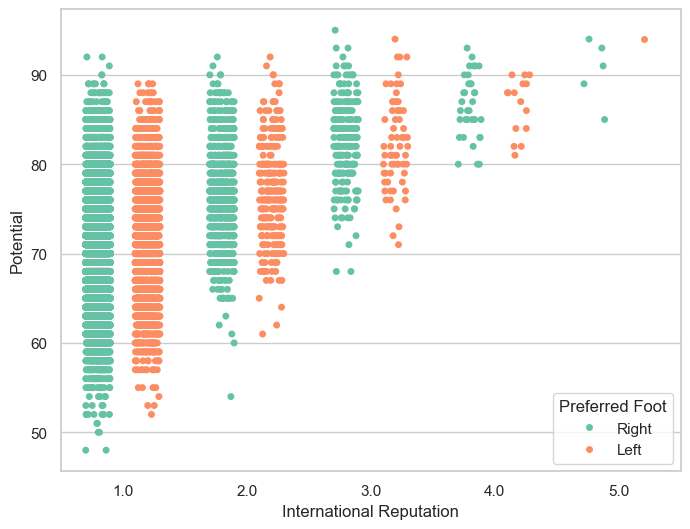

In [61]:
f,ax=plt.subplots(figsize=(8,6))
sns.stripplot(x='International Reputation',y='Potential',hue='Preferred Foot',
data=fifa,jitter=0.2,palette='Set2',dodge=True)
plt.show()

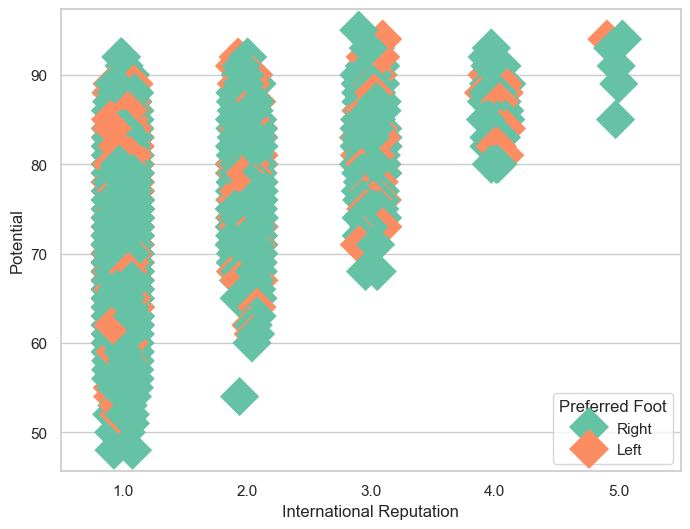

In [63]:
f,ax=plt.subplots(figsize=(8,6))
sns.stripplot(x='International Reputation',y='Potential',hue='Preferred Foot',
data=fifa,palette='Set2',size=20,marker='D')
plt.show()

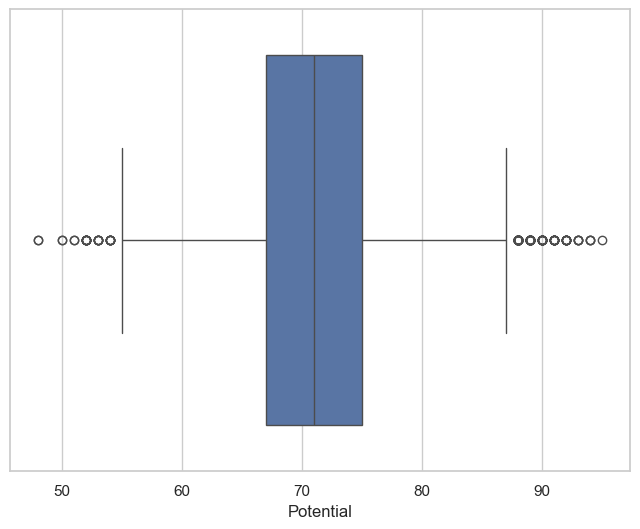

In [67]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x=fifa['Potential'])
plt.show()

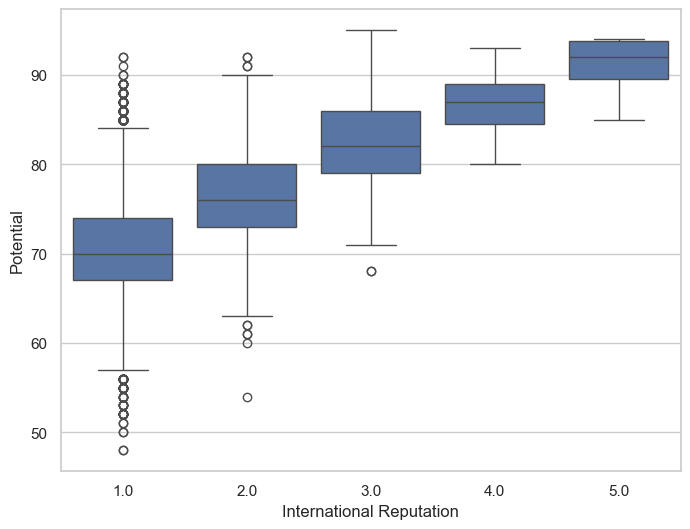

In [69]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x='International Reputation',y='Potential', data=fifa)
plt.show()

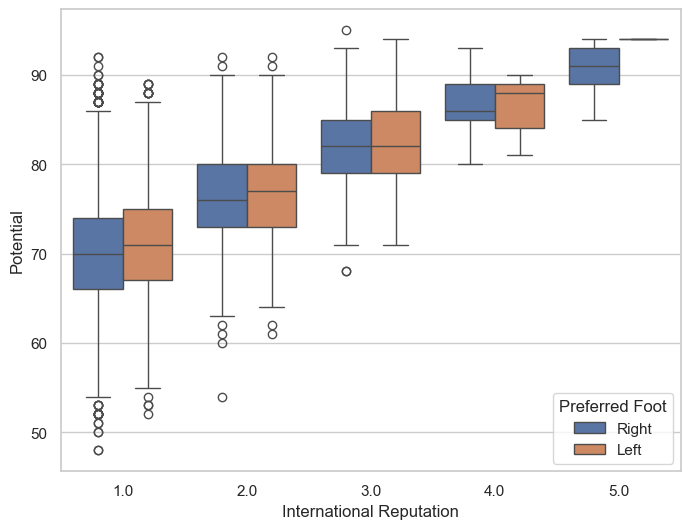

In [71]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x='International Reputation',y='Potential',hue='Preferred Foot', data = fifa)
plt.show()

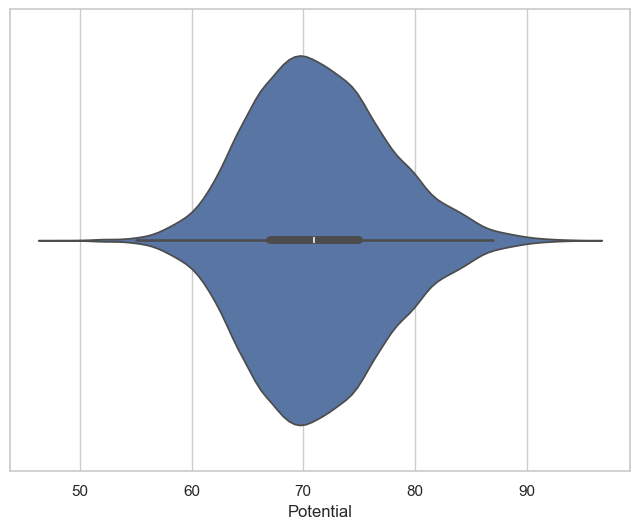

In [73]:
f,ax=plt.subplots(figsize=(8,6))
sns.violinplot(x=fifa['Potential'])
plt.show()

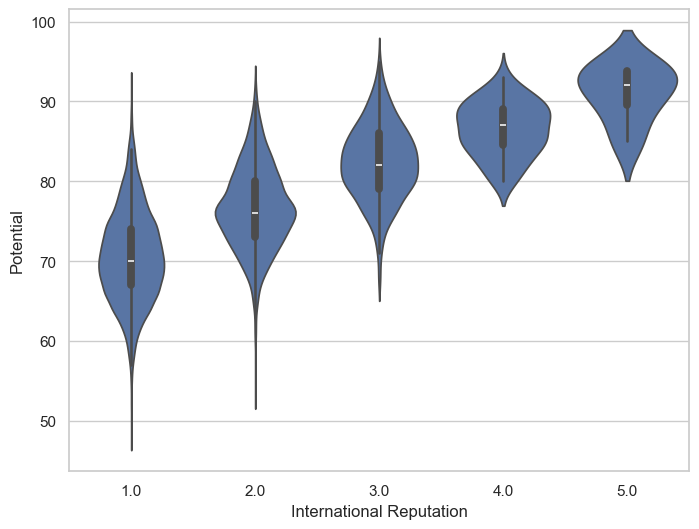

In [75]:
f,ax=plt.subplots(figsize=(8,6))
sns.violinplot(x='International Reputation',y='Potential', data=fifa)
plt.show()

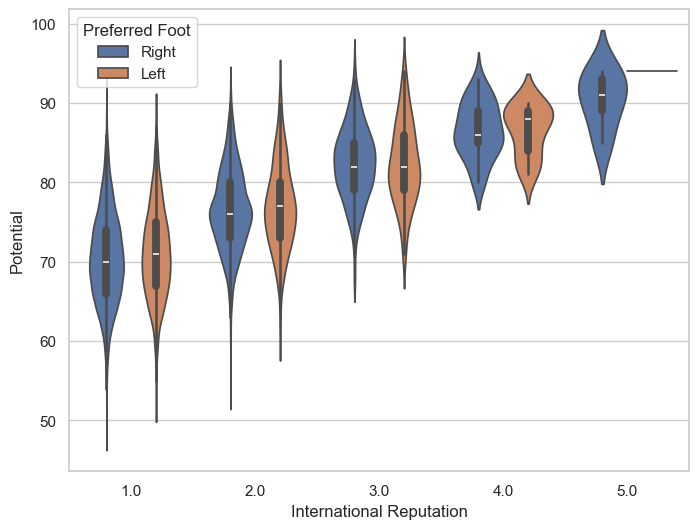

In [77]:
f,ax=plt.subplots(figsize=(8,6))
sns.violinplot(x='International Reputation',y='Potential',hue='Preferred Foot',data = fifa)
plt.show()

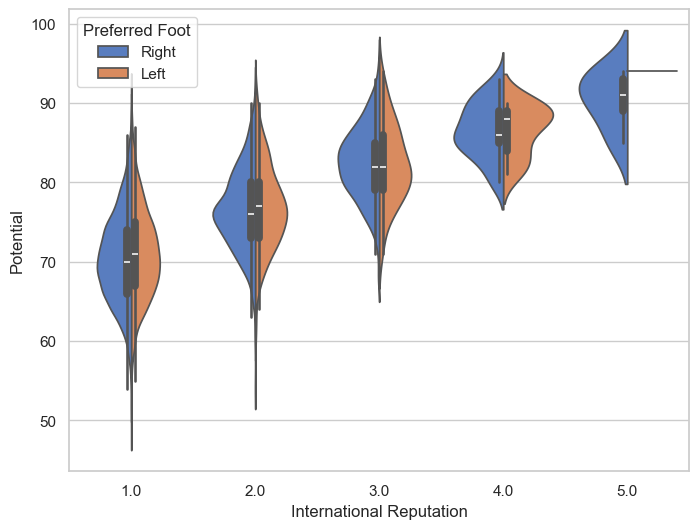

In [81]:
f,ax=plt.subplots(figsize=(8,6))
sns.violinplot(x='International Reputation',y='Potential',hue='Preferred Foot',data=fifa,palette='muted',split=True)
plt.show()

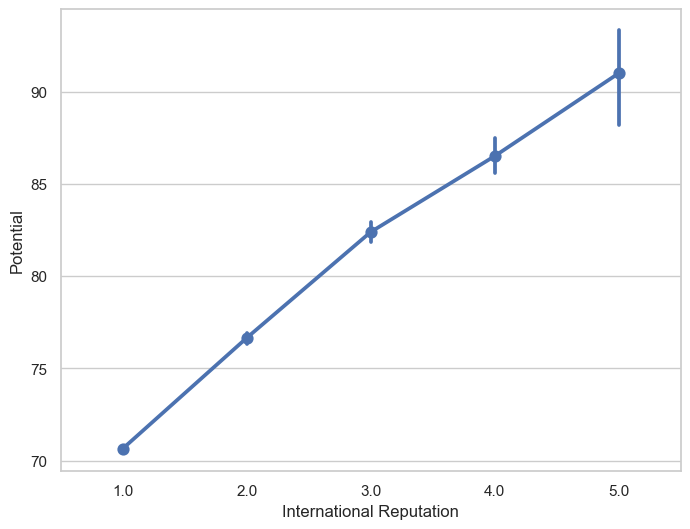

In [84]:
f,ax=plt.subplots(figsize=(8,6))
sns.pointplot(x='International Reputation',y='Potential', data=fifa)
plt.show()

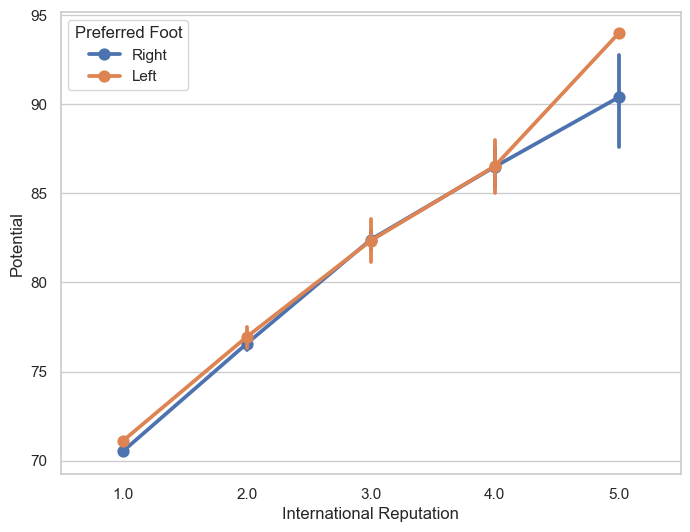

In [87]:
f,ax=plt.subplots(figsize=(8,6))
sns.pointplot(x='International Reputation',y='Potential',hue='Preferred Foot', data = fifa)
plt.show()

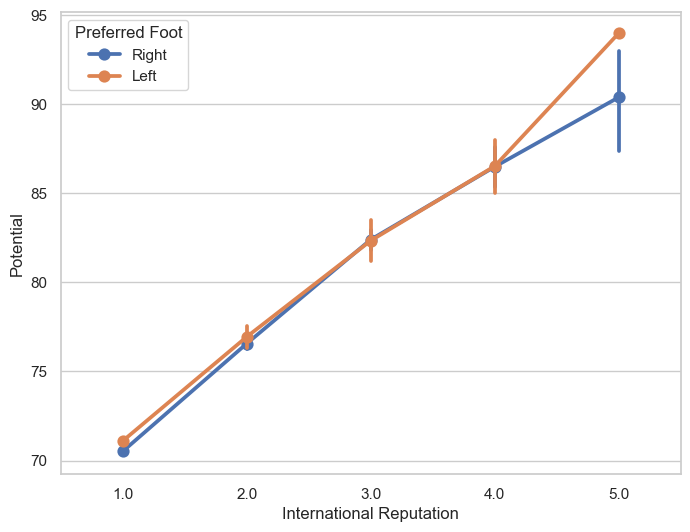

In [89]:
f,ax=plt.subplots(figsize=(8,6))
sns.pointplot(x='International Reputation',y='Potential',hue='Preferred Foot', data = fifa)
plt.show()

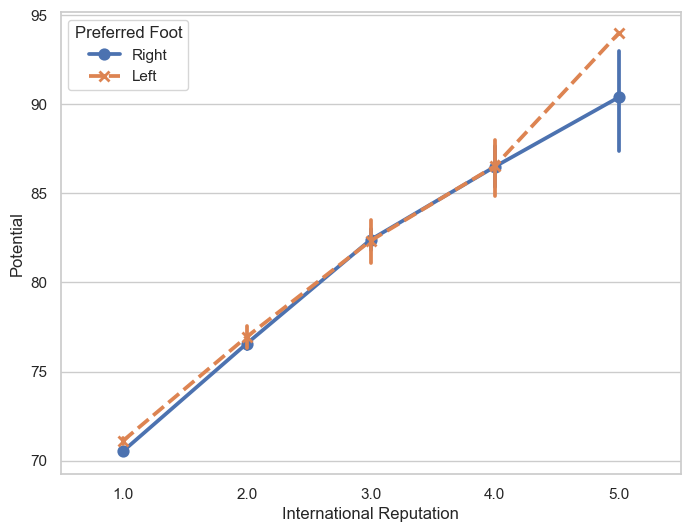

In [93]:
f,ax=plt.subplots(figsize=(8,6))
sns.pointplot(x='International Reputation',y='Potential',hue='Preferred Foot',
data=fifa, markers=["o","x"],linestyles=['-','--'])
plt.show()

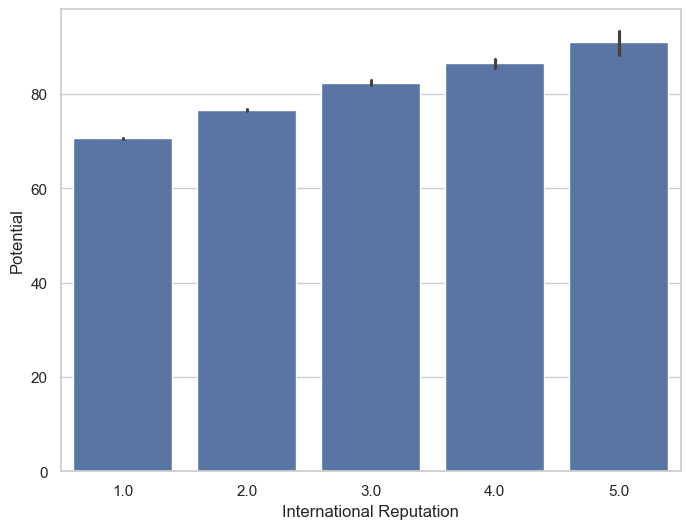

In [95]:
f,ax=plt.subplots(figsize=(8,6))
sns.barplot(x='International Reputation',y='Potential', data=fifa)
plt.show()

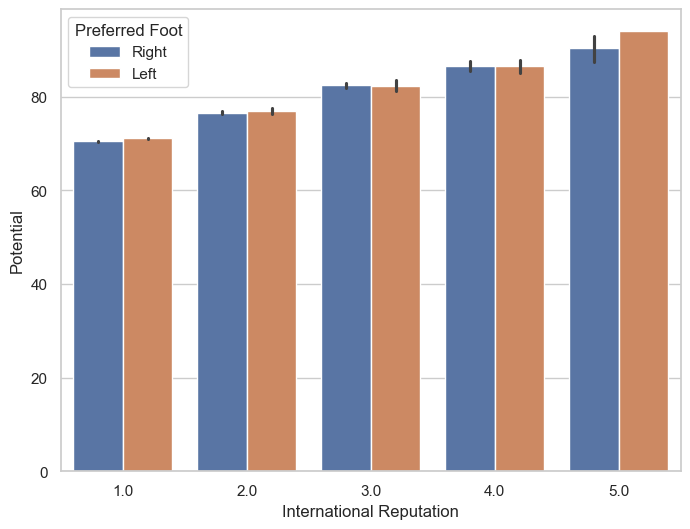

In [97]:
f,ax=plt.subplots(figsize=(8,6))
sns.barplot(x='International Reputation',y='Potential',hue='Preferred Foot', data = fifa)
plt.show()

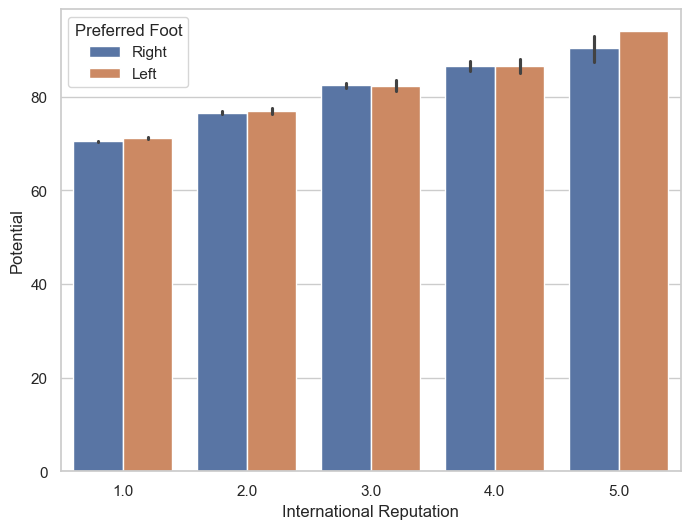

In [99]:
f,ax=plt.subplots(figsize=(8,6))
sns.barplot(x='International Reputation',y='Potential',hue='Preferred Foot', data = fifa)
plt.show()

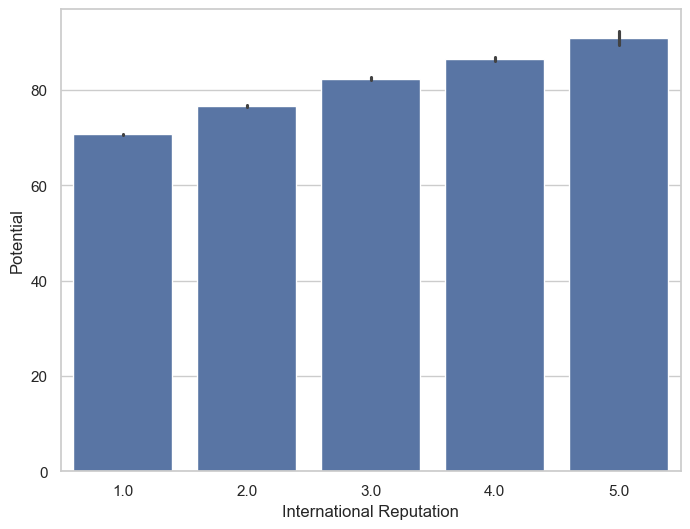

In [103]:
f,ax=plt.subplots(figsize=(8,6))
sns.barplot(x='International Reputation',y='Potential', data=fifa,ci=68)
plt.show()

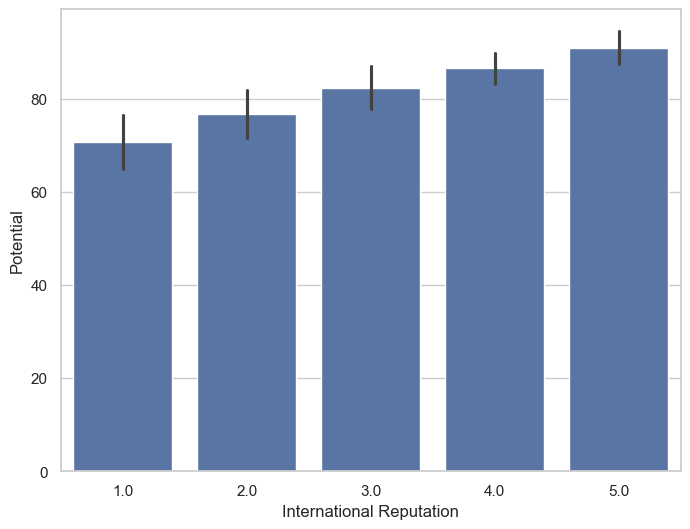

In [105]:
f,ax=plt.subplots(figsize=(8,6))
sns.barplot(x='International Reputation',y='Potential', data=fifa,ci='sd')
plt.show()

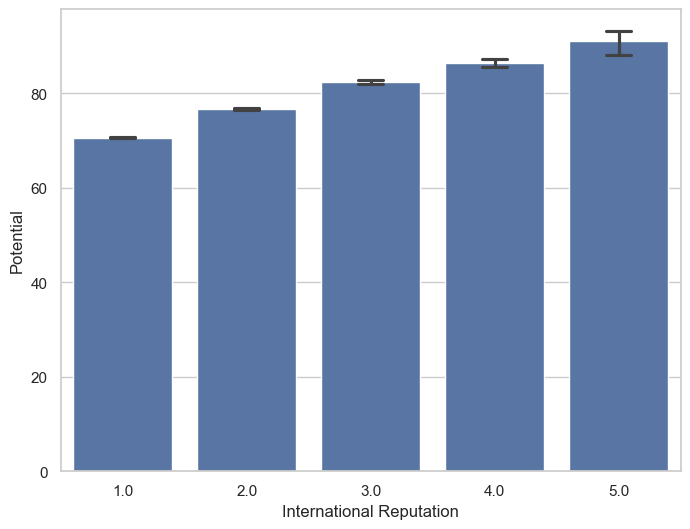

In [107]:
f,ax=plt.subplots(figsize=(8,6))
sns.barplot(x='International Reputation',y='Potential', data=fifa,capsize=0.2)
plt.show()

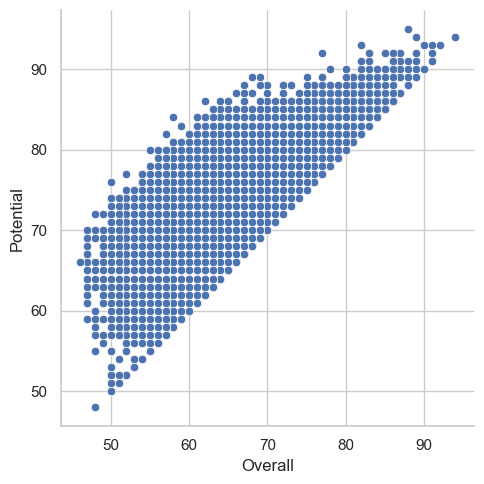

In [109]:
g=sns.relplot(x='Overall',y='Potential',data=fifa)

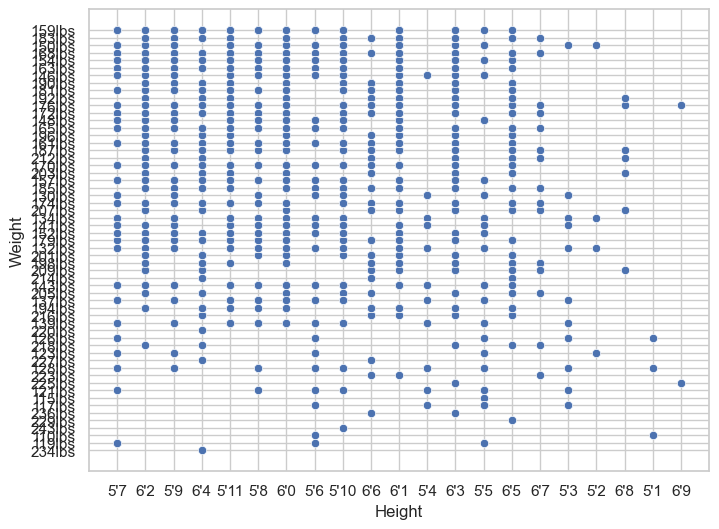

In [111]:
f,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x='Height', y='Weight',data=fifa)
plt.show()

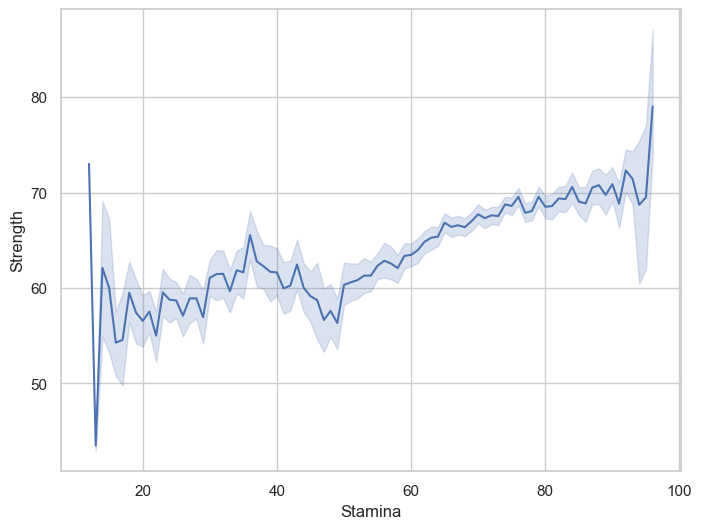

In [113]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.lineplot(x='Stamina', y='Strength',data=fifa)
plt.show()

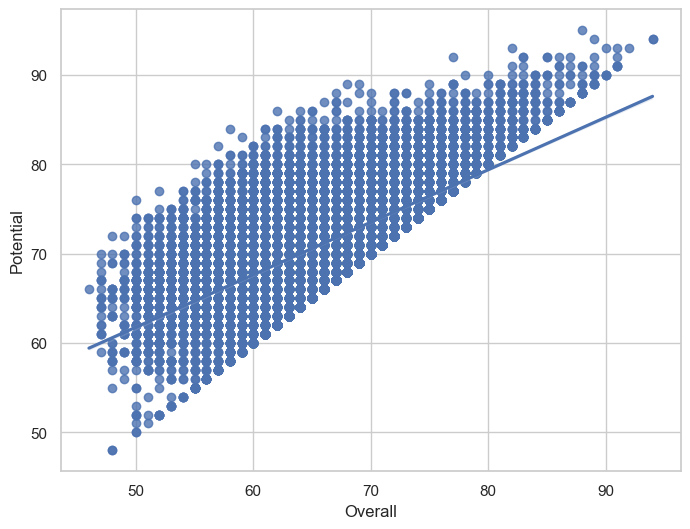

In [115]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.regplot(x='Overall', y='Potential',data=fifa)
plt.show()

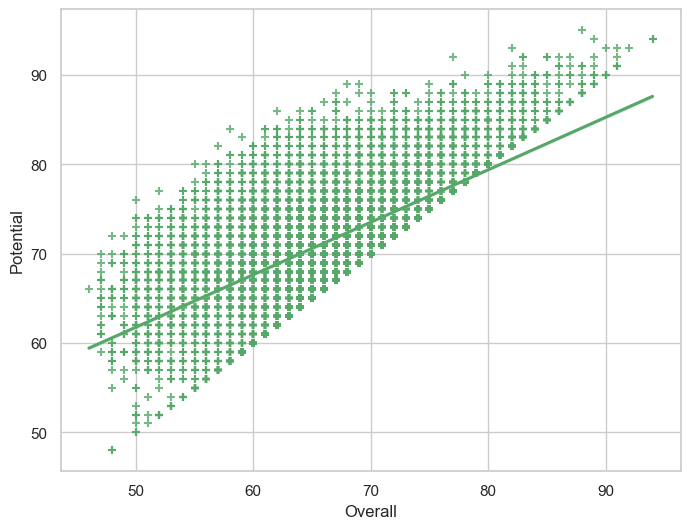

In [117]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.regplot(x='Overall', y='Potential',data=fifa,color='g',marker='+')
plt.show()

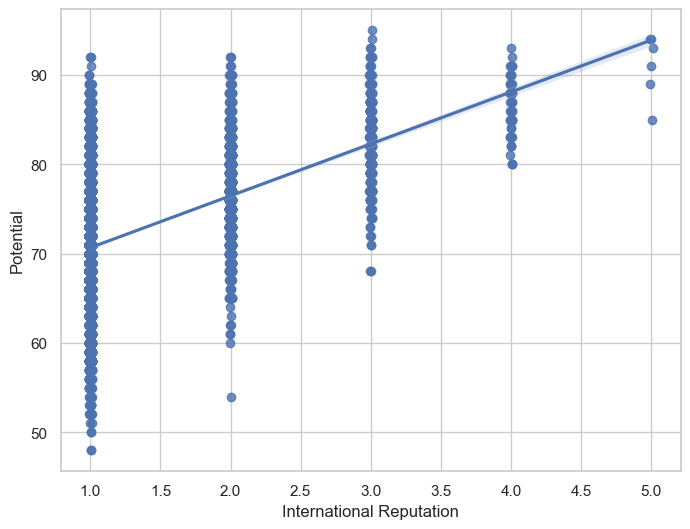

In [119]:
f,ax=plt.subplots(figsize=(8,6))
sns.regplot(x='International Reputation', y='Potential',data=fifa,x_jitter=.01)
plt.show()

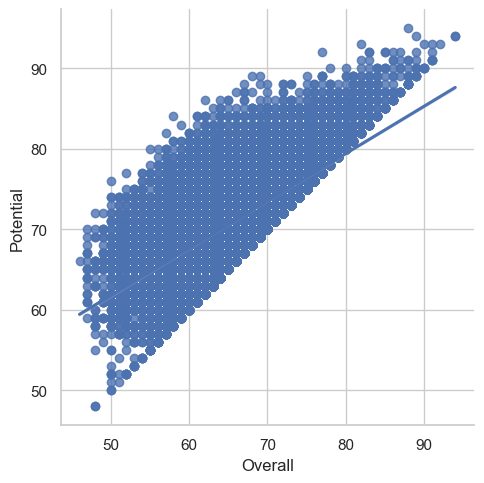

In [121]:
ax=sns.lmplot(x='Overall', y='Potential',data=fifa)

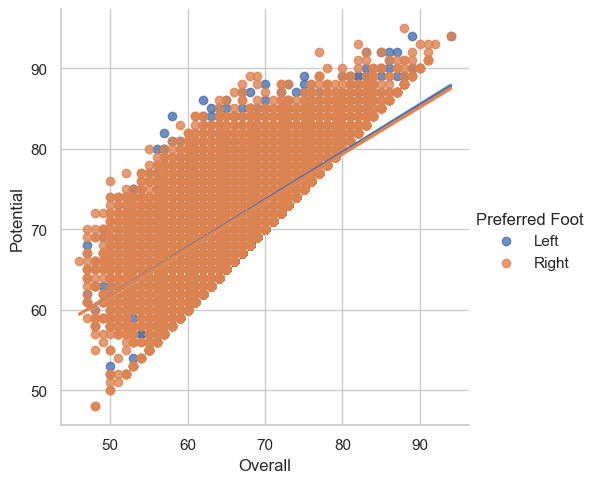

In [123]:
g=sns.lmplot(x='Overall', y='Potential',hue='Preferred Foot',data=fifa)

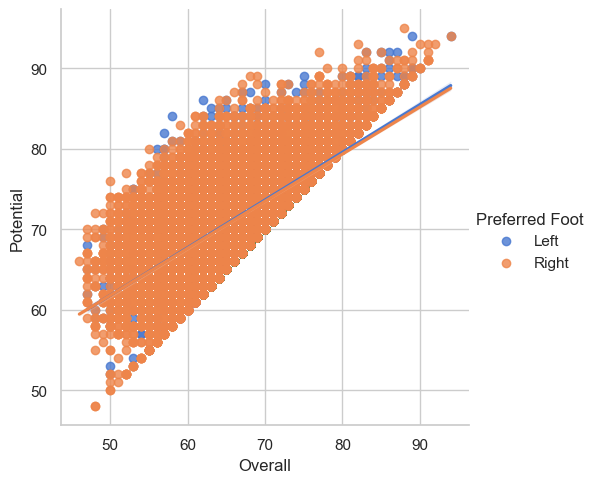

In [127]:
g=sns.lmplot(x='Overall', y='Potential',hue='Preferred Foot',data=fifa,palette = 'muted')

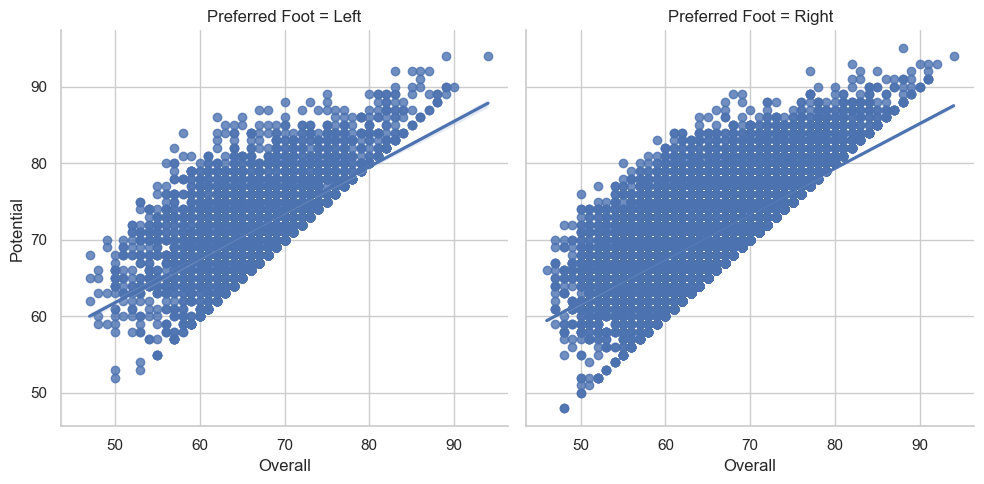

In [129]:
g=sns.lmplot(x='Overall', y='Potential',col='Preferred Foot',data=fifa)

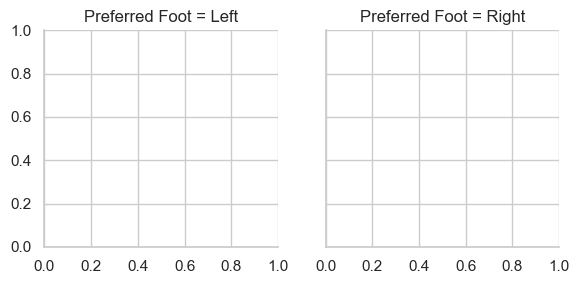

In [131]:
g=sns.FacetGrid(fifa,col='Preferred Foot')

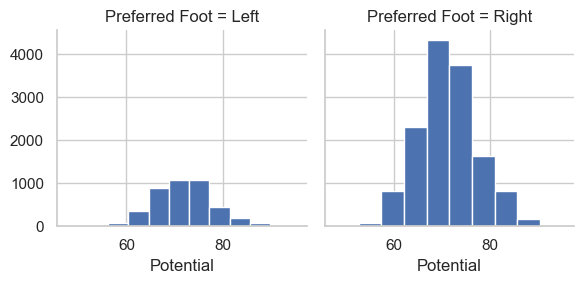

In [133]:
g=sns.FacetGrid(fifa,col='Preferred Foot')
g=g.map(plt.hist,'Potential')

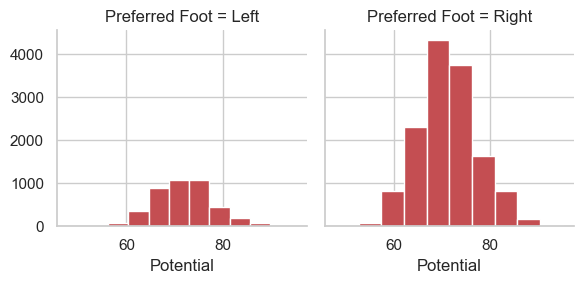

In [135]:
g=sns.FacetGrid(fifa,col='Preferred Foot')
g=g.map(plt.hist,'Potential',bins=10,color='r')

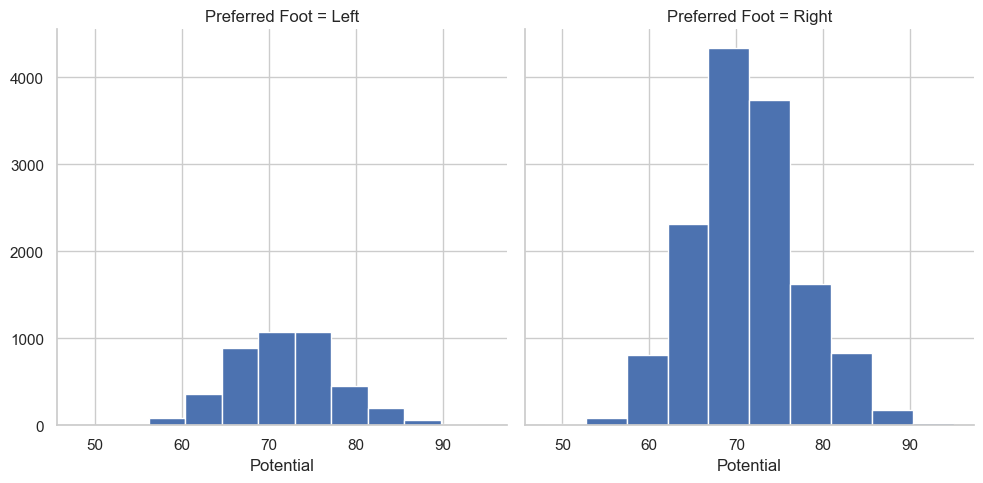

In [137]:
g=sns.FacetGrid(fifa,col='Preferred Foot',height=5,aspect=1)
g=g.map(plt.hist,'Potential')

In [141]:
fifa_new=fifa[['Age','Potential','Strength','Stamina','Preferred Foot']]

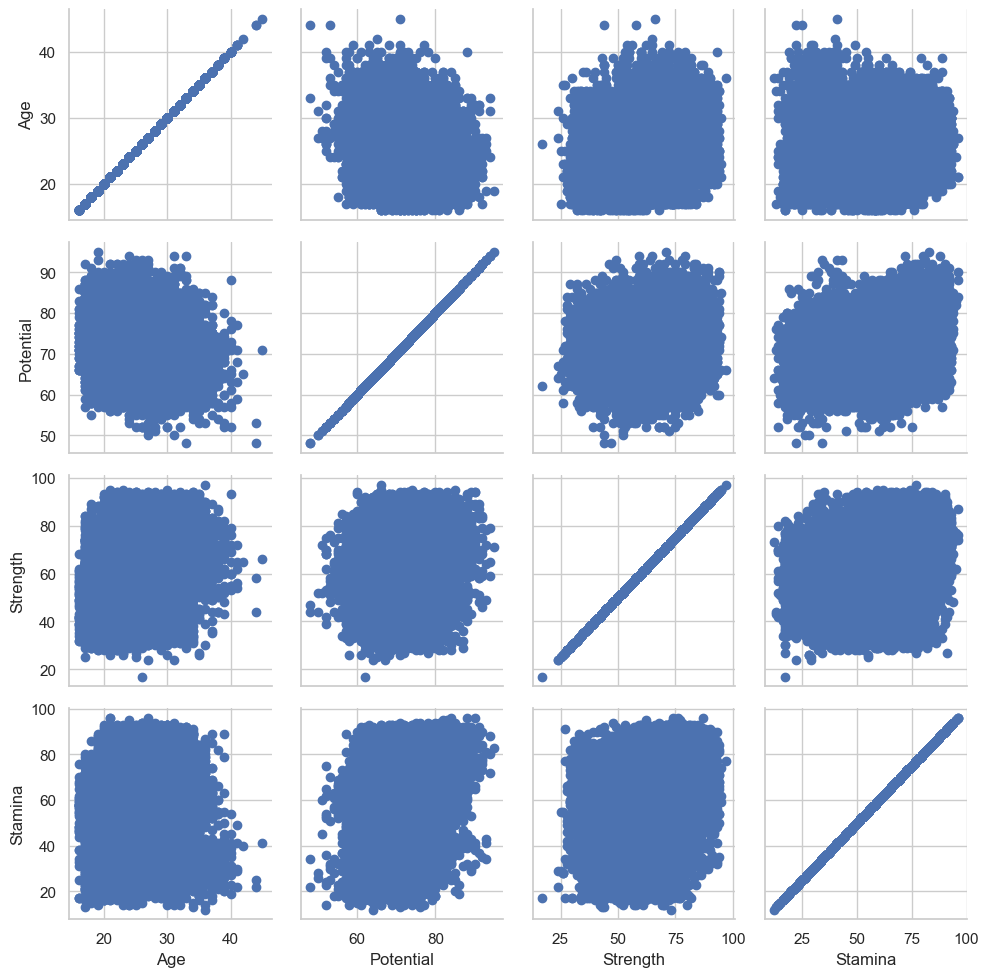

In [143]:
g=sns.PairGrid(fifa_new)
g=g.map(plt.scatter)

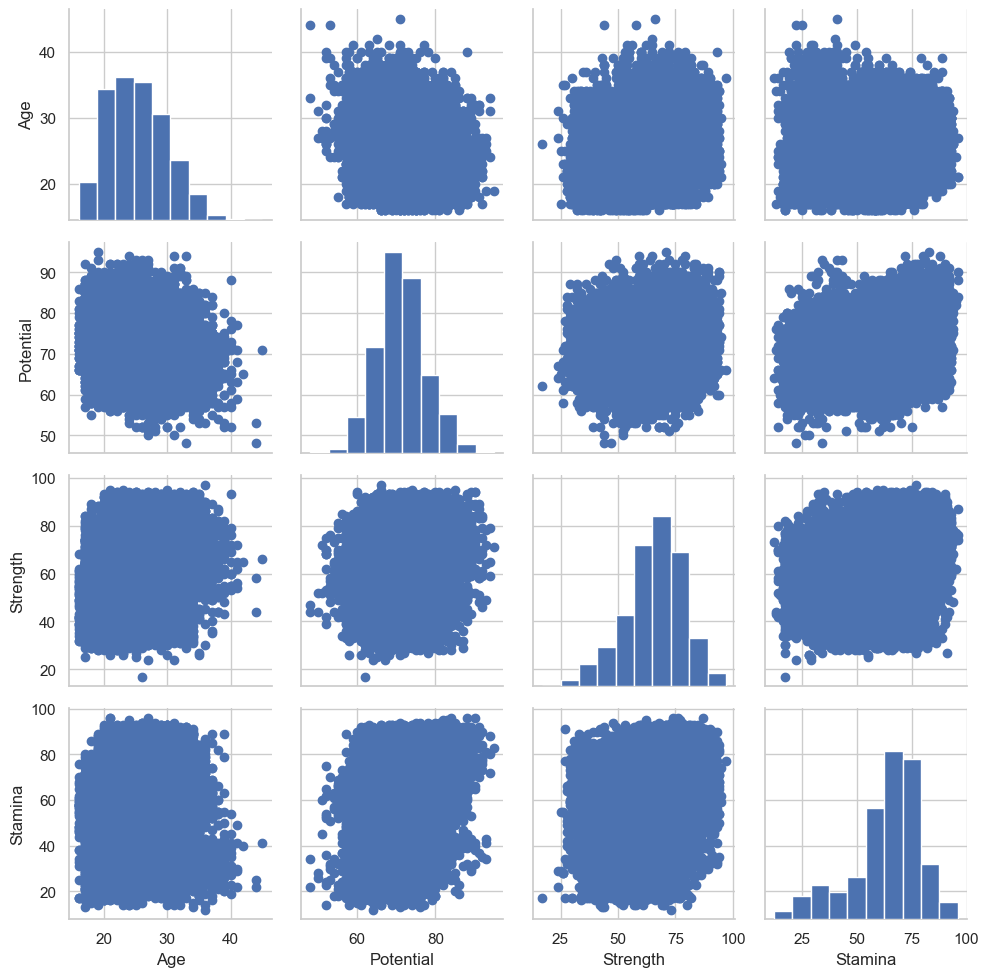

In [145]:
g=sns.PairGrid(fifa_new)
g=g.map_diag(plt.hist)
g=g.map_offdiag(plt.scatter)

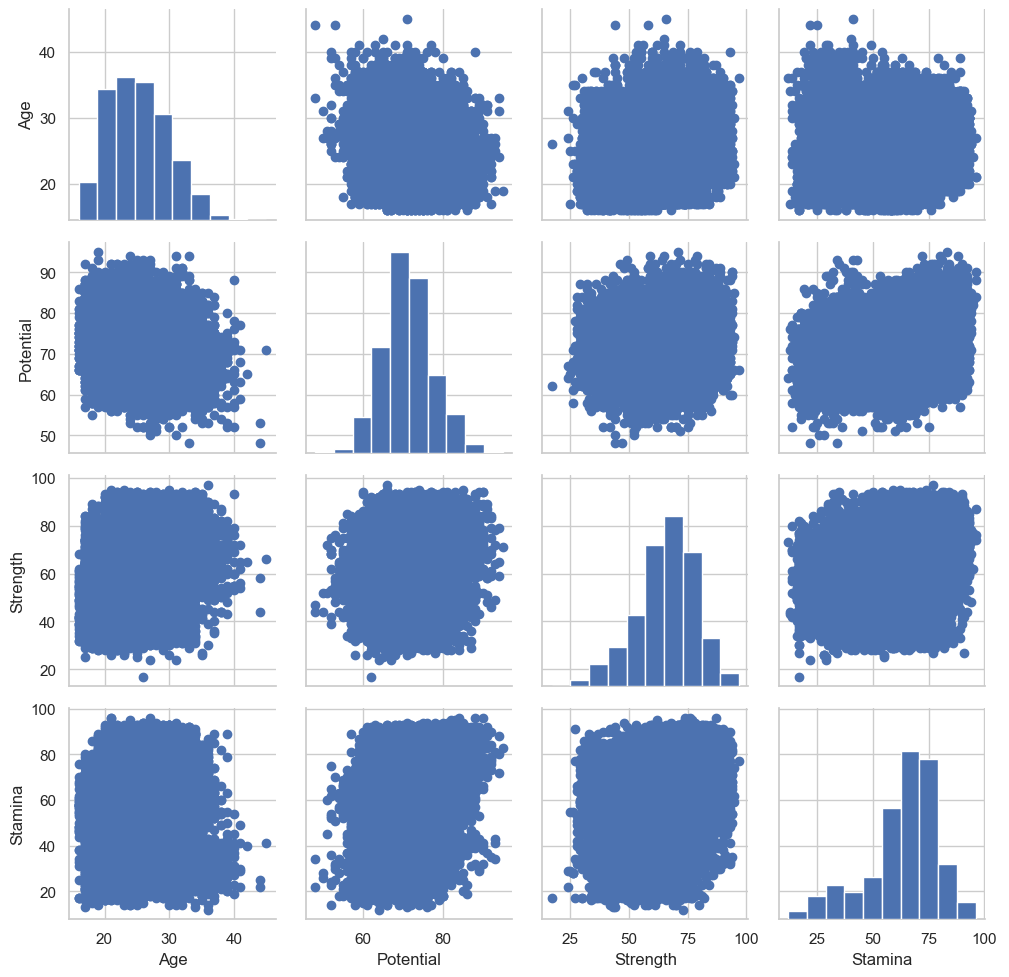

In [147]:
g=sns.PairGrid(fifa_new)
g=g.map_diag(plt.hist)
g=g.map_offdiag(plt.scatter)
g=g.add_legend()

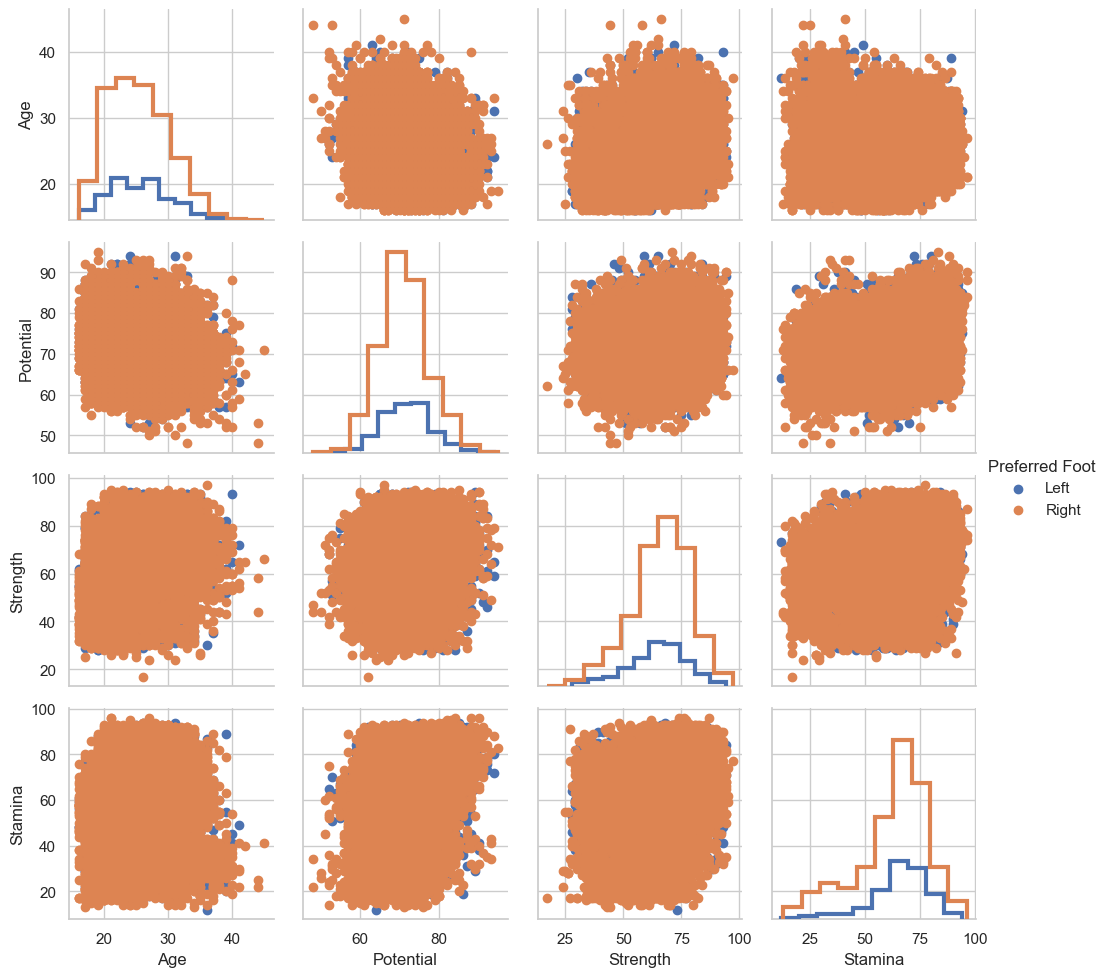

In [149]:
g=sns.PairGrid(fifa_new,hue='Preferred Foot')
g=g.map_diag(plt.hist,histtype='step',linewidth=3)
g=g.map_offdiag(plt.scatter)
g=g.add_legend()

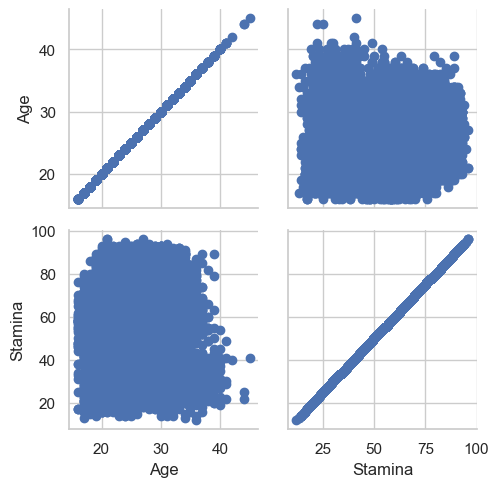

In [151]:
g=sns.PairGrid(fifa_new,vars=['Age','Stamina'])
g=g.map(plt.scatter)

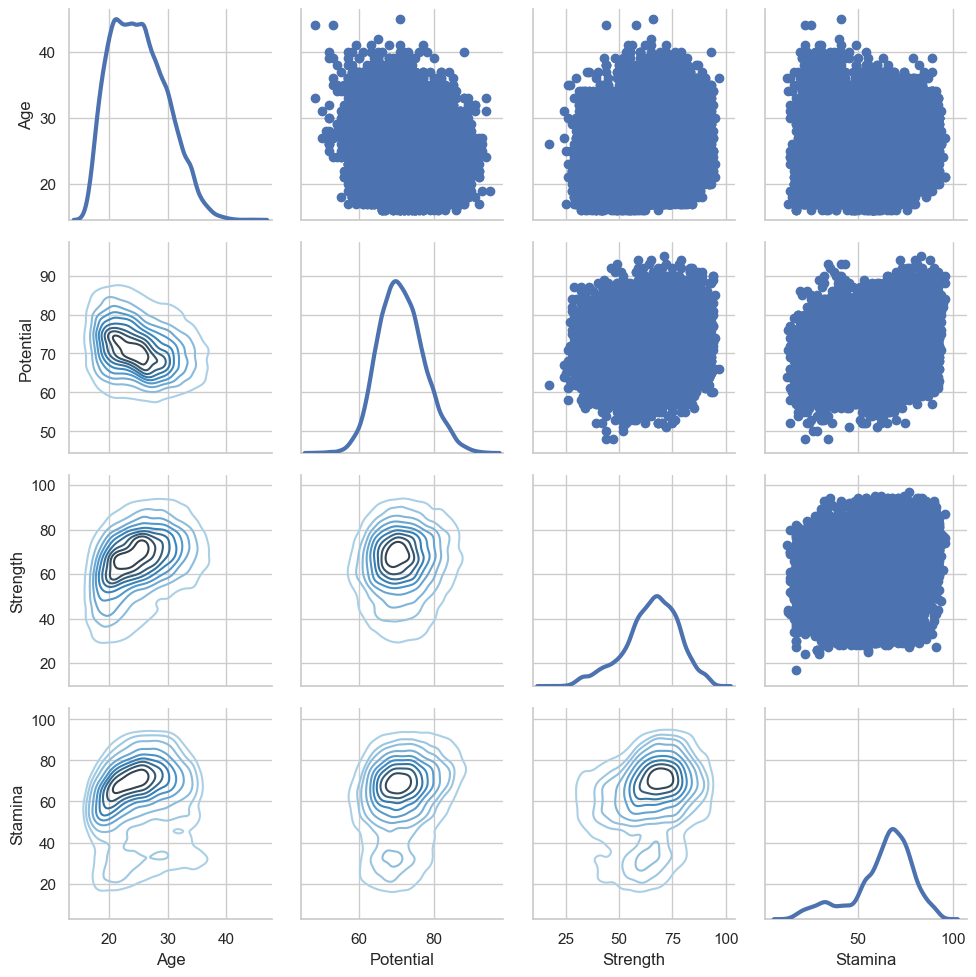

In [153]:
g=sns.PairGrid(fifa_new)
g=g.map_upper(plt.scatter)
g=g.map_lower(sns.kdeplot,cmap='Blues_d')
g=g.map_diag(sns.kdeplot,lw=3,legend=False)

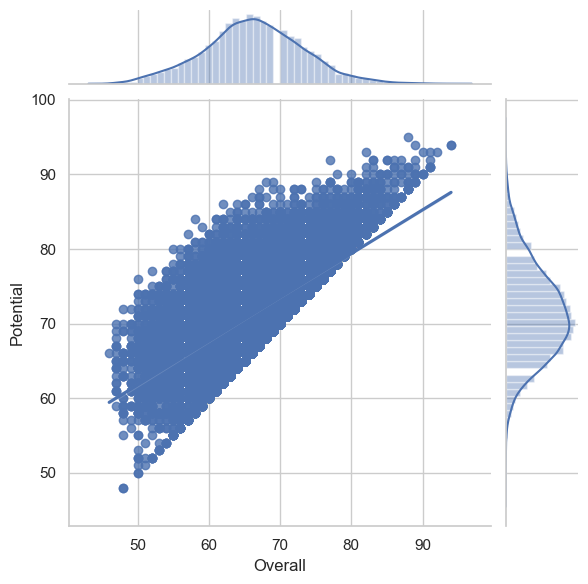

In [154]:
g=sns.JointGrid(x='Overall',y='Potential',data=fifa)
g=g.plot(sns.regplot,sns.distplot)

In [157]:
import matplotlib.pyplot as plt

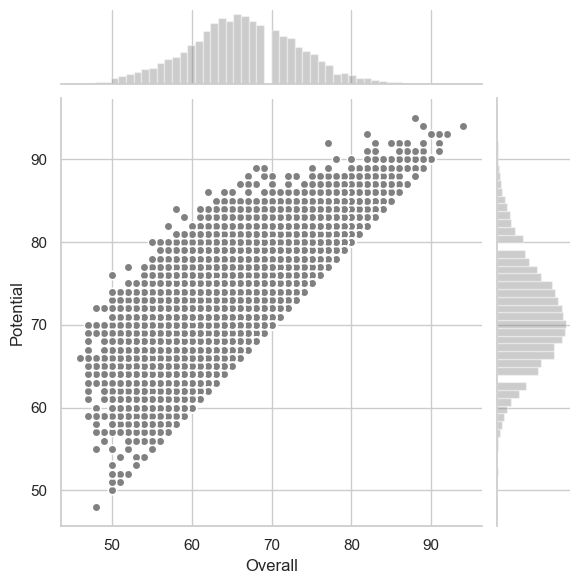

In [159]:
g=sns.JointGrid(x='Overall',y='Potential',data=fifa)
g=g.plot_joint(plt.scatter,color='.5',edgecolor='white')
g=g.plot_marginals(sns.distplot,kde=False,color='.5')

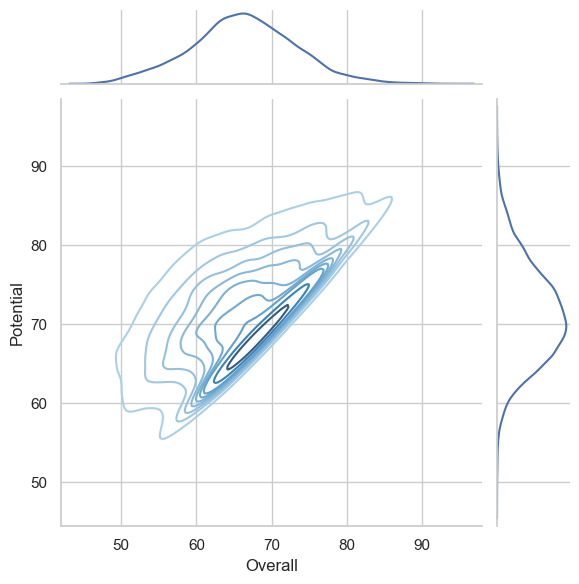

In [161]:
g=sns.JointGrid(x='Overall',y='Potential',data=fifa)
g=g.plot_joint(sns.kdeplot,cmap='Blues_d')
g=g.plot_marginals(sns.kdeplot,shade=False)

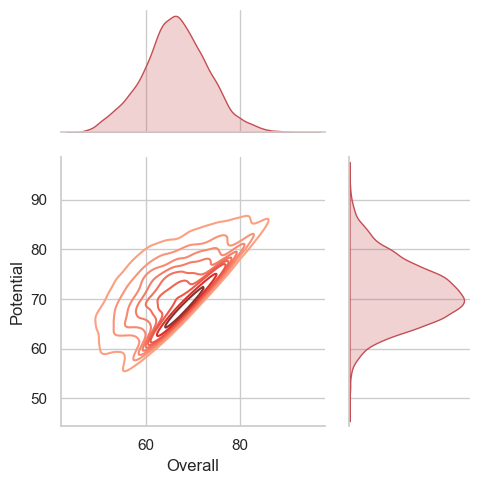

In [162]:
g=sns.JointGrid(x='Overall',y='Potential',data=fifa,height=5,ratio=2)
g=g.plot_joint(sns.kdeplot,cmap='Reds_d')
g=g.plot_marginals(sns.kdeplot,color='r',shade=True)

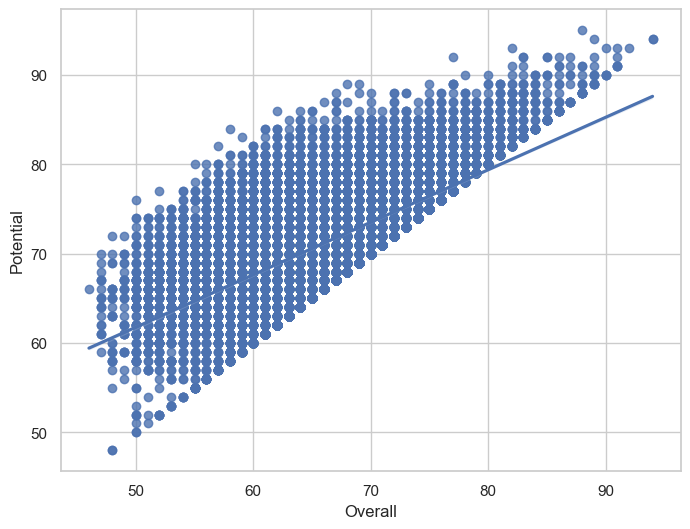

In [164]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.regplot(x='Overall', y='Potential',data=fifa)

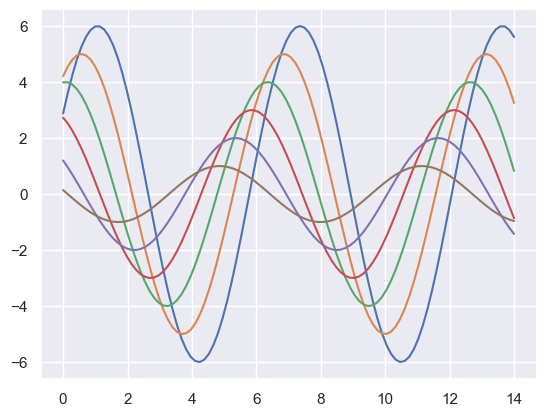

In [175]:
def sinplot(flip=1):
    x=np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x,np.sin(x + i* .5) * (7 - i)* flip)
sinplot()

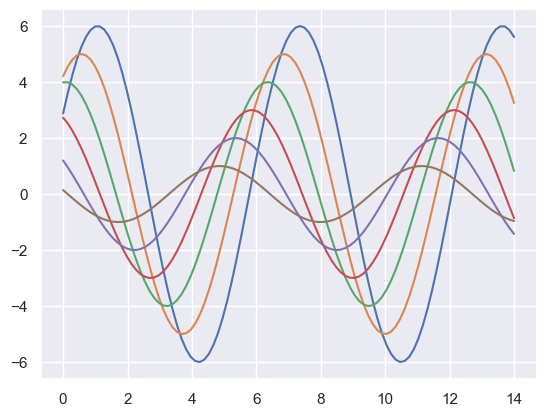

In [169]:
sns.set()
sinplot()

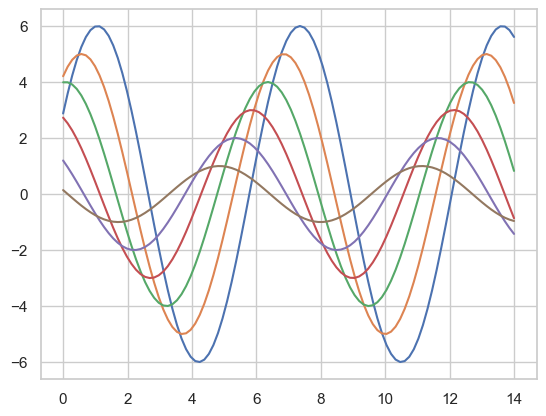

In [177]:
sns.set_style('whitegrid')
sinplot()

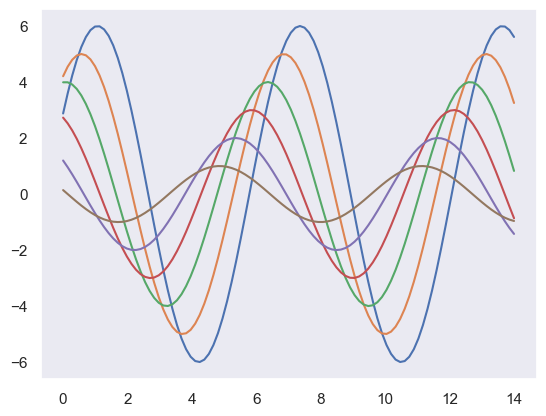

In [179]:
sns.set_style('dark')
sinplot()

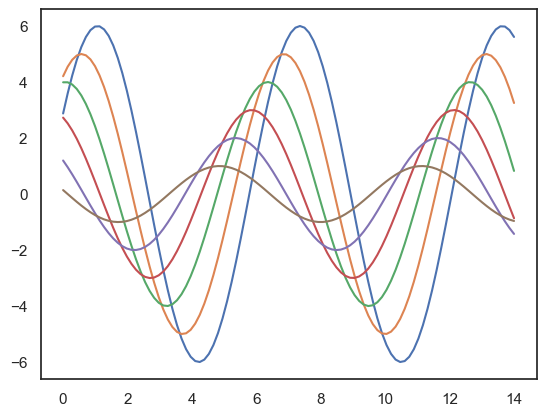

In [182]:
sns.set_style('white')
sinplot()

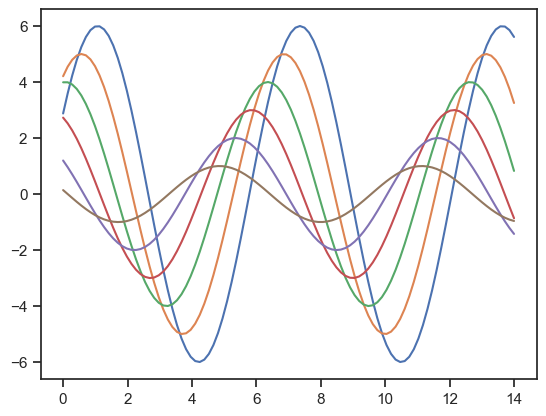

In [184]:
sns.set_style('ticks')
sinplot()